### Kelly Tornetta

### Titanic Data - Neural Network

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

### Importing Data

In [142]:
df = pd.read_csv('Titanic.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [143]:
df.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')

In [144]:
df = df.drop(['Unnamed: 0', 'name', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis = 'columns')

In [145]:
df.head()

,pclass,survived,sex,age,sibsp
0,1st,1,female,29.0000,0
1,1st,1,male,0.9167,1
2,1st,0,female,2.0000,1
3,1st,0,male,30.0000,1
4,1st,0,female,25.0000,1


### Missing Data

In [146]:
df.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
dtype: int64

In [147]:
df["age"] = df["age"].fillna(df["age"].median())

In [148]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
dtype: int64

### Format Data

In [149]:
X = df.drop('survived', axis = 'columns').copy()
X.head()

,pclass,sex,age,sibsp
0,1st,female,29.0000,0
1,1st,male,0.9167,1
2,1st,female,2.0000,1
3,1st,male,30.0000,1
4,1st,female,25.0000,1


In [150]:
y = df['survived'].copy()
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [151]:
df.dtypes

pclass       object
survived      int64
sex          object
age         float64
sibsp         int64
dtype: object

In [152]:
df['pclass'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [153]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [154]:
X_encoded = pd.get_dummies(X, columns = ['pclass', 'sex'])
X_encoded.head()

,age,sibsp,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male
0,29.0000,0,1,0,0,1,0
1,0.9167,1,1,0,0,0,1
2,2.0000,1,1,0,0,1,0
3,30.0000,1,1,0,0,0,1
4,25.0000,1,1,0,0,1,0


In [155]:
y.unique()

array([1, 0])

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2)

### Accuracy from Pruned Tree (decision_tree_titanic)

In decision_tree_titanic, I built and plotted a pruned decision tree using the Titanic data. It had the following sample accuracies:

in‐sample percent survivors correctly predicted (on training set): $\frac{281}{281+117} = 70.6\% $

in-sample percent fatalities correctly predicted (on training set): $\frac{580}{580+69} = 89.4\%$

out‐of‐sample percent survivors correctly predicted (on test set): $\frac{61}{61+41} = 59.8\%$

out-of‐sample percent fatalities correctly predicted (on test set): $\frac{143}{143+17} = 89.4\%$

Next, I will fit two neural networks to the same data and compare the accuracies. 

### First Neural Network

Iteration 1, loss = 0.70297229
Iteration 2, loss = 0.65470912
Iteration 3, loss = 0.64755376
Iteration 4, loss = 0.60170808
Iteration 5, loss = 0.55830589
Iteration 6, loss = 0.52504156
Iteration 7, loss = 0.48900599
Iteration 8, loss = 0.46222980
Iteration 9, loss = 0.45119484
Iteration 10, loss = 0.44389292
Iteration 11, loss = 0.44477742
Iteration 12, loss = 0.44108780
Iteration 13, loss = 0.44592109
Iteration 14, loss = 0.43914334
Iteration 15, loss = 0.44206696
Iteration 16, loss = 0.43917675
Iteration 17, loss = 0.44237753
Iteration 18, loss = 0.44539807
Iteration 19, loss = 0.44139143
Iteration 20, loss = 0.44163083
Iteration 21, loss = 0.44527072
Iteration 22, loss = 0.44284946
Iteration 23, loss = 0.44233018
Iteration 24, loss = 0.44110692
Iteration 25, loss = 0.43708393
Iteration 26, loss = 0.47298482
Iteration 27, loss = 0.44249241
Iteration 28, loss = 0.44500754
Iteration 29, loss = 0.45010231
Iteration 30, loss = 0.44949969
Iteration 31, loss = 0.44905505
Iteration 32, los

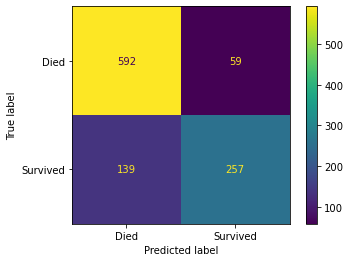

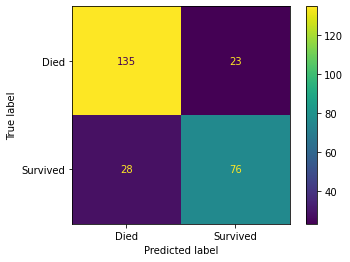

In [157]:
nn1 = MLPClassifier(activation = 'logistic', solver = 'adam', hidden_layer_sizes = (10, 20),
                    random_state = 1, verbose = 10, learning_rate_init = .1)
nn1.out_activation_ = 'logistic'
nn1.fit(X_train, y_train)

plot_confusion_matrix(nn1, X_train, y_train, display_labels = ["Died", "Survived"])
plot_confusion_matrix(nn1, X_test, y_test, display_labels = ["Died", "Survived"])

After fitting my first neural network, we can see the following sample accuracies:

in‐sample percent survivors correctly predicted (on training set): $\frac{257}{257+139} = 64.9\% $

in-sample percent fatalities correctly predicted (on training set): $\frac{592}{592+59} = 90.1\%$

out‐of‐sample percent survivors correctly predicted (on test set): $\frac{76}{76+28} = 73.1\%$

out-of‐sample percent fatalities correctly predicted (on test set): $\frac{135}{135+23} = 85.4\%$


### Second Neural Network - Different Number of Neurons in the Hidden Layers

Iteration 1, loss = 0.73806232
Iteration 2, loss = 0.67457344
Iteration 3, loss = 0.65244526
Iteration 4, loss = 0.55252475
Iteration 5, loss = 0.50293274
Iteration 6, loss = 0.50536202
Iteration 7, loss = 0.50713133
Iteration 8, loss = 0.47762106
Iteration 9, loss = 0.47756287
Iteration 10, loss = 0.46711308
Iteration 11, loss = 0.46031935
Iteration 12, loss = 0.47024976
Iteration 13, loss = 0.45018508
Iteration 14, loss = 0.45903089
Iteration 15, loss = 0.45899623
Iteration 16, loss = 0.44826393
Iteration 17, loss = 0.45176020
Iteration 18, loss = 0.44905117
Iteration 19, loss = 0.45307490
Iteration 20, loss = 0.44692532
Iteration 21, loss = 0.44543685
Iteration 22, loss = 0.44434338
Iteration 23, loss = 0.44722575
Iteration 24, loss = 0.44293529
Iteration 25, loss = 0.45379026
Iteration 26, loss = 0.45149249
Iteration 27, loss = 0.43845083
Iteration 28, loss = 0.47375021
Iteration 29, loss = 0.45924070
Iteration 30, loss = 0.45687245
Iteration 31, loss = 0.44443913
Iteration 32, los

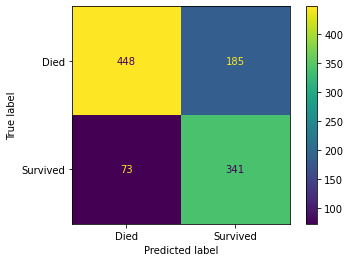

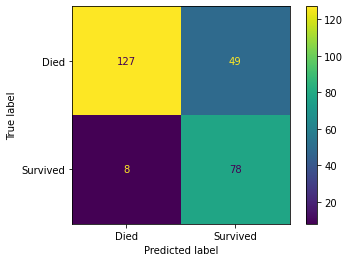

In [198]:
nn2 = MLPClassifier(activation = 'logistic', solver = 'adam', hidden_layer_sizes = (40, 20),
                    random_state = 1, verbose = 10, learning_rate_init = .1)
nn2.out_activation_ = 'logistic'
nn2.fit(X_train, y_train)
plot_confusion_matrix(nn2, X_train, y_train, display_labels = ["Died", "Survived"])
plot_confusion_matrix(nn2, X_test, y_test, display_labels = ["Died", "Survived"])

After fitting my second neural network, we can see the following sample accuracies:

in‐sample percent survivors correctly predicted (on training set): $\frac{341}{341+73} = 82.4\% $

in-sample percent fatalities correctly predicted (on training set): $\frac{448}{448+185} = 70.1\%$

out‐of‐sample percent survivors correctly predicted (on test set): $\frac{78}{78+8} = 90.7\%$

out-of‐sample percent fatalities correctly predicted (on test set): $\frac{127}{127+49} = 72.2\%$

### Comparing Models

In [184]:
data = {'Pruned Decision Tree':['70.6%', '89.4%', '59.8%', '89.4%'], 
        'Neural Network 1':['64.9%', '90.1%', '73.1%', '85.4%'], 
        'Neural Network 2': ['82.4%', '70.1%', '90.7%', '72.2%']} 
 
chart = pd.DataFrame(data, index =['in‐sample percent survivors correctly predicted (on training set):', 
                                   'in-sample percent fatalities correctly predicted (on training set):', 
                                   'out‐of‐sample percent survivors correctly predicted (on test set):', 
                                   'out-of‐sample percent fatalities correctly predicted (on test set):'])  
chart 

,Pruned Decision Tree,Neural Network 1,Neural Network 2
in‐sample percent survivors correctly predicted (on training set):,70.6%,64.9%,82.4%
in-sample percent fatalities correctly predicted (on training set):,89.4%,90.1%,70.1%
out‐of‐sample percent survivors correctly predicted (on test set):,59.8%,73.1%,90.7%
out-of‐sample percent fatalities correctly predicted (on test set):,89.4%,85.4%,72.2%


The pruned decision tree has the most accurate out-of-sample fatalities prediction. The second neural network has the most accurate out-of-sample survivors prediction and the most accurate in-sample survivors prediction. The first neural network has the most accurate in-sample fatalities prediction. Based on this comparison, I would choose to model using the second neural network.